<a href="https://colab.research.google.com/github/Joubert93/Cr-ation-/blob/main/DIABETS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIABETS PROJECT

### IMPORTATION DES BIBLIOTHEQUES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Chargement du jeu de données à partir d'un fichier CSV

In [ ]:
df = pd.read_csv("diabetes_data_upload.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## ANALYSE DES DONNEES

In [ ]:
df.shape

(520, 17)

In [ ]:
# Affichage des premières lignes du DataFrame pour vérification
print(df.head())

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

### Description des variables

1. **Âge (Age):**
   - Type : Numérique
   - Plage : 1-20 à 65 ans
   - Description : La variable représente l'âge du patient.

2. **Sexe (Sex):**
   - Type : Catégorique
   - Catégories :
       - 1: Homme
       - 2: Femme
   - Description : La variable représente le sexe du patient.

3. **Polyurie:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : La polyurie se réfère à une miction excessive, c'est-à-dire une production d'urine anormalement élevée.

4. **Polydipsie:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : La polydipsie se réfère à une soif excessive.

5. **Perte de poids soudaine:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique si le patient a connu une perte de poids soudaine.

6. **Faiblesse:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique si le patient présente une faiblesse.

7. **Polyphagie:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : La polyphagie se réfère à une augmentation anormale de l'appétit.

8. **Muguet génital:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique la présence de muguet génital, une infection fongique.

9. **Flou visuel:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique si le patient éprouve un flou visuel.

10. **Démangeaisons:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique si le patient ressent des démangeaisons.

11. **Irritabilité:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique si le patient est irritable.

12. **Guérison retardée:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique si le patient présente une guérison retardée des blessures.

13. **Parésie partielle:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique si le patient présente une paralysie partielle.

14. **Courbatures musculaires:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique si le patient ressent des courbatures musculaires.

15. **Alopécie:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique si le patient présente une perte de cheveux.

16. **Obésité:**
   - Type : Catégorique
   - Catégories :
       - 1: Oui
       - 2: Non
   - Description : Indique si le patient est obèse.

17. **Classe (Class):**
   - Type : Catégorique
   - Catégories :
       - 1: Positive
       - 2: Négative
   - Description : La variable cible, indiquant si le patient a le diabète (Positive) ou non (Négative).

### Suppression des variables "Age" et "Gender"

In [ ]:
# Supprimer les variables "Age" et "Sexe"
df = df.drop(["Age", "Gender"], axis=1)

# Afficher le DataFrame après la suppression
print(df.head())

  Polyuria Polydipsia sudden weight loss weakness Polyphagia Genital thrush  \
0       No        Yes                 No      Yes         No             No   
1       No         No                 No      Yes         No             No   
2      Yes         No                 No      Yes        Yes             No   
3       No         No                Yes      Yes        Yes            Yes   
4      Yes        Yes                Yes      Yes        Yes             No   

  visual blurring Itching Irritability delayed healing partial paresis  \
0              No     Yes           No             Yes              No   
1             Yes      No           No              No             Yes   
2              No     Yes           No             Yes              No   
3              No     Yes           No             Yes              No   
4             Yes     Yes          Yes             Yes             Yes   

  muscle stiffness Alopecia Obesity     class  
0              Yes      Yes     

In [ ]:
df

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


### Remplacement des "YES" en 1 et des "No" en 0

In [ ]:
# Remplacer 'Yes' par 1 et 'No' par 0 dans tout le DataFrame
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Afficher le DataFrame après la conversion
print(df.head())

   Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0         0           1                   0         1           0   
1         0           0                   0         1           0   
2         1           0                   0         1           1   
3         0           0                   1         1           1   
4         1           1                   1         1           1   

   Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial paresis  muscle stiffness  Alopecia  Obesity     class  
0                0                 1         1  

In [ ]:
df['class']

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
515    Positive
516    Positive
517    Positive
518    Negative
519    Negative
Name: class, Length: 520, dtype: object

In [ ]:
# Remplacer 'Positives' par 1 et 'Negatives' par 0 dans une colonne spécifique (par exemple, 'Classe')
df['class'] = df['class'].replace({'Positive': 1, 'Negative': 0})

# Afficher le DataFrame après la conversion
print(df.head())

   Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0         0           1                   0         1           0   
1         0           0                   0         1           0   
2         1           0                   0         1           1   
3         0           0                   1         1           1   
4         1           1                   1         1           1   

   Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial paresis  muscle stiffness  Alopecia  Obesity  class  
0                0                 1         1     

### Vérifier le type de chaque variable

In [ ]:
# Afficher le type de chaque colonne
print(df.dtypes)

Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object


### Conversion de toutes les variables en float

In [ ]:
# Parcours de chaque colonne du DataFrame
for column in df.columns:
    # Conversion de la colonne en type float en ignorant les erreurs de conversion
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Afficher les types de données des colonnes
print(df.dtypes)

Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object


In [ ]:
df

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### Gestion des données manquantes

In [ ]:
#Compter le nombre de valeurs manquantes par variable
missing_values_count = df.isnull().sum()

# Afficher le nombre de valeurs manquantes par variable
print("Nombre de valeurs manquantes par variable :\n", missing_values_count)

# Afficher les variables qui contiennent des valeurs manquantes
missing_variables = df.columns[df.isnull().any()].tolist()
print("\nVariables avec des valeurs manquantes :", missing_variables)

Nombre de valeurs manquantes par variable :
 Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Variables avec des valeurs manquantes : []


Commentaires : Aucune valeur manquante dans notre df

### HEATMAP

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

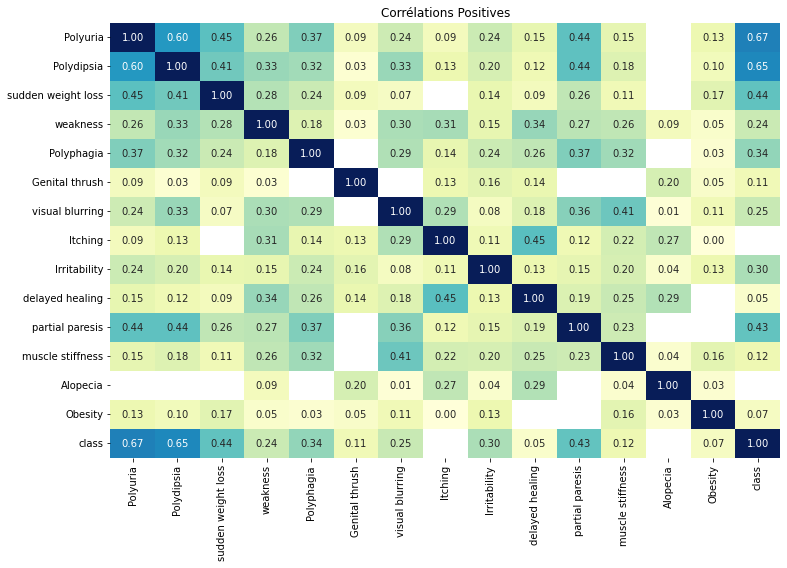

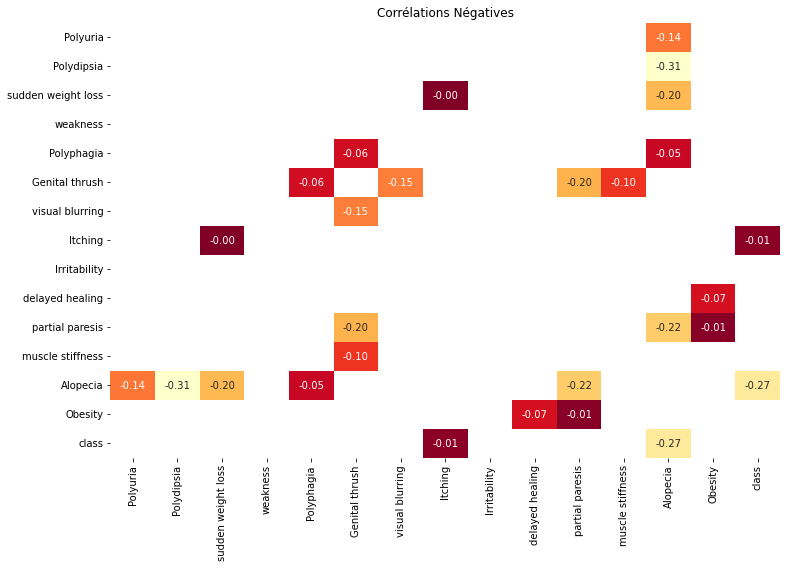

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Séparer les corrélations positives et négatives
positive_corr_matrix = correlation_matrix[correlation_matrix > 0]
negative_corr_matrix = correlation_matrix[correlation_matrix < 0]

# Tracer le heatmap pour les corrélations positives
plt.figure(figsize=(12, 8))
sns.heatmap(positive_corr_matrix, cmap='YlGnBu', annot=True, fmt=".2f", cbar=False)
plt.title('Corrélations Positives')
plt.show()

# Tracer le heatmap pour les corrélations négatives
plt.figure(figsize=(12, 8))
sns.heatmap(negative_corr_matrix, cmap='YlOrRd', annot=True, fmt=".2f", cbar=False)
plt.title('Corrélations Négatives')
plt.show()

### Distribution de chaque variable

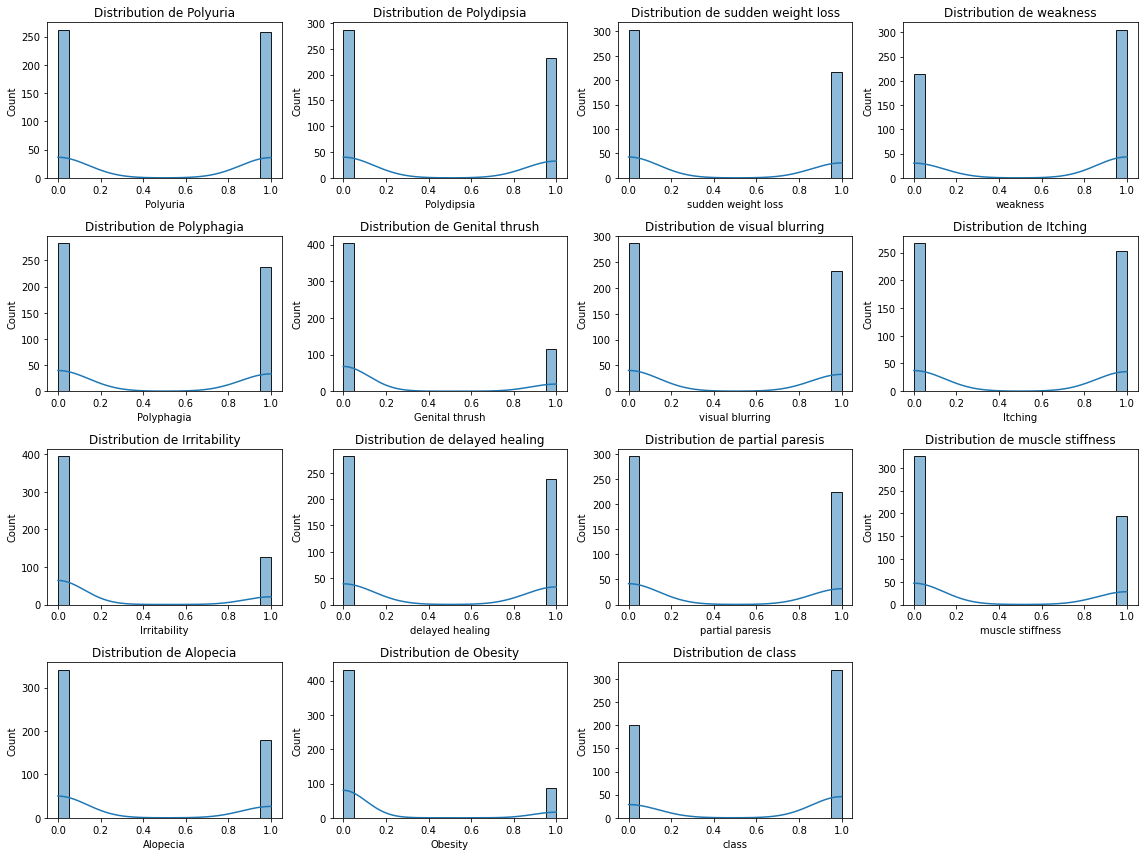

In [ ]:
# Définir la taille de la figure
plt.figure(figsize=(16, 12))

# Parcourir chaque colonne du DataFrame et tracer un histogramme
for i, colonne in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # 4x4 sous-plots pour une mise en page propre
    sns.histplot(df[colonne], bins=20, kde=True)  # Tracer un histogramme avec une estimation de la densité kernel
    plt.title(f'Distribution de {colonne}')

# Ajuster l'espacement entre les sous-plots pour une meilleure lisibilité
plt.tight_layout()
plt.show()

In [ ]:
# Parcourir chaque colonne du DataFrame
for colonne in df.columns:
    # Afficher le décompte des valeurs pour chaque variable
    print(f'\nDécompte des valeurs dans la colonne {colonne} :')
    print(df[colonne].value_counts())


Décompte des valeurs dans la colonne Polyuria :
0    262
1    258
Name: Polyuria, dtype: int64

Décompte des valeurs dans la colonne Polydipsia :
0    287
1    233
Name: Polydipsia, dtype: int64

Décompte des valeurs dans la colonne sudden weight loss :
0    303
1    217
Name: sudden weight loss, dtype: int64

Décompte des valeurs dans la colonne weakness :
1    305
0    215
Name: weakness, dtype: int64

Décompte des valeurs dans la colonne Polyphagia :
0    283
1    237
Name: Polyphagia, dtype: int64

Décompte des valeurs dans la colonne Genital thrush :
0    404
1    116
Name: Genital thrush, dtype: int64

Décompte des valeurs dans la colonne visual blurring :
0    287
1    233
Name: visual blurring, dtype: int64

Décompte des valeurs dans la colonne Itching :
0    267
1    253
Name: Itching, dtype: int64

Décompte des valeurs dans la colonne Irritability :
0    394
1    126
Name: Irritability, dtype: int64

Décompte des valeurs dans la colonne delayed healing :
0    281
1    239
Na

In [ ]:
# Créer un DataFrame pour stocker les décomptes
decomptes_df = pd.DataFrame()

# Parcourir chaque colonne du DataFrame
for colonne in df.columns:
    # Ajouter une colonne au DataFrame de décomptes
    decomptes_df[colonne] = df[colonne].value_counts()

# Afficher le DataFrame de décomptes
print(decomptes_df)

   Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0       262         287                 303       215         283   
1       258         233                 217       305         237   

   Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0             404              287      267           394              281   
1             116              233      253           126              239   

   partial paresis  muscle stiffness  Alopecia  Obesity  class  
0              296               325       341      432    200  
1              224               195       179       88    320  


### MODELISATION

In [ ]:
# 1) Créer une matrice des variables indépendantes (X) et le vecteur de la variable dépendante (Y).
# X est la matrice et Y (outcome) est le vecteur

X = df.drop('class', axis=1)  # Supprimer la colonne "target" de la matrice X
Y = df['class']

In [ ]:
X

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

### Séparation du dataset en training_set et en test_set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state= 0)

# Calculer la proportion de chaque ensemble
train_prop = len(X_train) / len(X)
test_prop = len(X_test) / len(X)

print("Proportion de données dans l'ensemble d'entraînement: {:.2f}".format(train_prop))
print("Proportion de données dans l'ensemble de test: {:.2f}".format(test_prop))

Proportion de données dans l'ensemble d'entraînement: 0.67
Proportion de données dans l'ensemble de test: 0.33


## 1- Régression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

# Création et entraînement du modèle de régression logistique
RL = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
RL.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Prédire les classes pour les données de test
Y_pred1 = RL.predict(X_test)
Y_pred1

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
      dtype=int64)

### METRICS

In [ ]:
from sklearn.metrics import confusion_matrix
CM1 = confusion_matrix(Y_test, Y_pred1)
CM1

array([[56, 11],
       [12, 95]], dtype=int64)

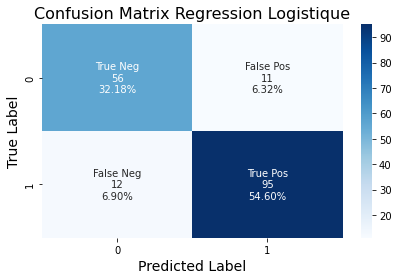

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM1.flatten()/np.sum(CM1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM1, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix Regression Logistique', fontsize=16)
plt.tight_layout()
plt.show()

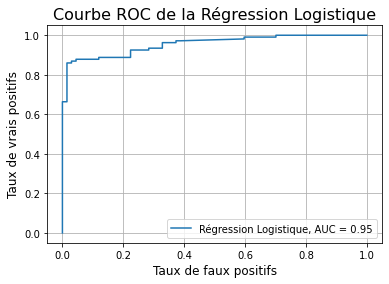

In [ ]:
from sklearn import metrics

y_pred_proba1 = RL.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba1)
auc = metrics.roc_auc_score(Y_test, y_pred_proba1)

plt.plot(fpr, tpr, label="Régression Logistique, AUC = {:.2f}".format(auc))
plt.legend(loc="lower right")
plt.title('Courbe ROC de la Régression Logistique', fontsize=16)
plt.xlabel('Taux de faux positifs', fontsize=12)
plt.ylabel('Taux de vrais positifs', fontsize=12)
plt.grid(True)
plt.show()

Precision: 0.90 (CI: 0.85 - 0.95)
Recall: 0.89 (CI: 0.84 - 0.94)
Accuracy Rate: 0.87 (CI: 0.82 - 0.92)
F1 Score: 0.89 (CI: 0.84 - 0.94)
Cohen's Kappa: 0.72 (CI: 0.67 - 0.77)
Matthews Corrcoef: 0.72 (CI: 0.67 - 0.77)
AUC: 0.95 (CI: 0.90 - 1.01)


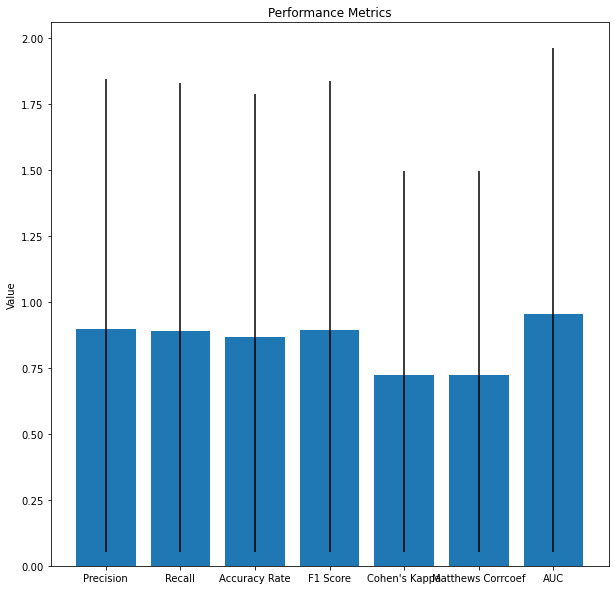

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, matthews_corrcoef
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Calculer les métriques
Accuracy_Rate1 = accuracy_score(Y_test, Y_pred1)
F1_score1 = f1_score(Y_test, Y_pred1)
Precision1 = precision_score(Y_test, Y_pred1)
Recall1 = recall_score(Y_test, Y_pred1)
CK1 = cohen_kappa_score(Y_test, Y_pred1)
MC1 = matthews_corrcoef(Y_test, Y_pred1)
auc1 = metrics.roc_auc_score(Y_test, y_pred_proba1)

# Calculer les intervalles de confiance
conf_level = 0.95

# Create a list of metric names and values
metric_names = ["Precision", "Recall", "Accuracy Rate", "F1 Score", "Cohen's Kappa", "Matthews Corrcoef", "AUC"]
metric_values = [Precision1, Recall1, Accuracy_Rate1, F1_score1, CK1, MC1, auc1]

# Calculate confidence intervals using normal distribution approximation
conf_intervals = [stats.norm.interval(conf_level, loc=metric_val, scale=stats.sem(Y_pred1 == Y_test)) for metric_val in metric_values]

# Print metric names, values, and confidence intervals
for name, value, interval in zip(metric_names, metric_values, conf_intervals):
    print(f"{name}: {value:.2f} (CI: {interval[0]:.2f} - {interval[1]:.2f})")

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(metric_names, metric_values, yerr=np.array(conf_intervals).T)
ax.set_ylabel('Value')
ax.set_title('Performance Metrics')
plt.show()

## 2- Random Forest

In [ ]:
# Importation de la classe RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Création et entraînement du modèle de forêt aléatoire
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prédire les classes pour les données de test en utilisant les mêmes fonctionnalités sélectionnées
Y_pred2 = RF.predict(X_test)

# Afficher les prédictions
print(Y_pred2)

[1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1
 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0
 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1]


In [ ]:
CM2 = confusion_matrix(Y_test, Y_pred2)
CM2

array([[ 66,   1],
       [  3, 104]], dtype=int64)

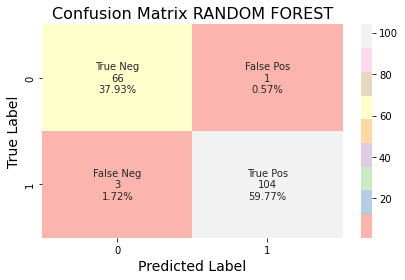

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM2.flatten()/np.sum(CM2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM2, annot=labels, fmt='', cmap='Pastel1')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix RANDOM FOREST', fontsize=16)
plt.tight_layout()
plt.show()

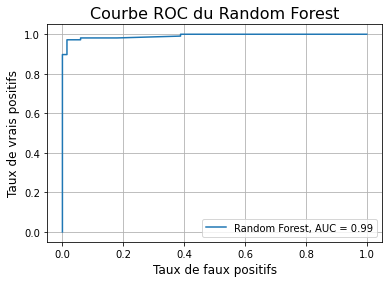

In [ ]:
# Prédictions des probabilités pour la classe positive (classe 1)
y_pred_proba_rf = RF.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs et de vrais positifs
fpr_rf, tpr_rf, _ = metrics.roc_curve(Y_test, y_pred_proba_rf)

# Calcul de l'aire sous la courbe ROC (AUC)
auc_rf = metrics.roc_auc_score(Y_test, y_pred_proba_rf)

# Tracer la courbe ROC
plt.plot(fpr_rf, tpr_rf, label="Random Forest, AUC = {:.2f}".format(auc_rf))
plt.legend(loc="lower right")
plt.title('Courbe ROC du Random Forest', fontsize=16)
plt.xlabel('Taux de faux positifs', fontsize=12)
plt.ylabel('Taux de vrais positifs', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn import metrics

# Réinitialiser l'index de Y_test
Y_test = Y_test.reset_index(drop=True)

# Calculer l'aire sous la courbe ROC (AUC) pour les prédictions
auc = metrics.roc_auc_score(Y_test, y_pred_proba_rf)

# Nombre d'échantillons bootstrap
n_bootstrap = 1000

# Liste pour stocker les valeurs d'AUC bootstrap
auc_bootstrap = []

# Effectuer le bootstrap
for _ in range(n_bootstrap):
    # Générer un échantillon bootstrap en rééchantillonnant les prédictions avec remplacement
    indices = np.random.choice(len(y_pred_proba_rf), len(y_pred_proba_rf), replace=True)
    bootstrap_preds = y_pred_proba_rf[indices]
    bootstrap_labels = Y_test[indices]

    # Réinitialiser l'index de bootstrap_labels
    bootstrap_labels = bootstrap_labels.reset_index(drop=True)

    # Calculer l'AUC pour l'échantillon bootstrap
    bootstrap_auc = metrics.roc_auc_score(bootstrap_labels, bootstrap_preds)

    # Ajouter l'AUC bootstrap à la liste
    auc_bootstrap.append(bootstrap_auc)

# Calculer l'intervalle de confiance à 95% pour l'AUC
lower = np.percentile(auc_bootstrap, 2.5)
upper = np.percentile(auc_bootstrap, 97.5)

# Afficher l'AUC et l'intervalle de confiance
print("AUC:", auc)
print("Intervalle de confiance à 95%:", (lower, upper))

AUC: 0.9920491002929279
Intervalle de confiance à 95%: (0.9816159264210735, 0.9995957156600764)


Precision : 0.99
Recall OU SENSIBILITE: 0.97
Accuracy rate:  0.9770114942528736
Error rate :  0.02298850574712641
F1_score:  0.9811320754716981
CK: 0.9517270079067832
MC: 0.9520043531040515
AUC: 0.9920491002929279


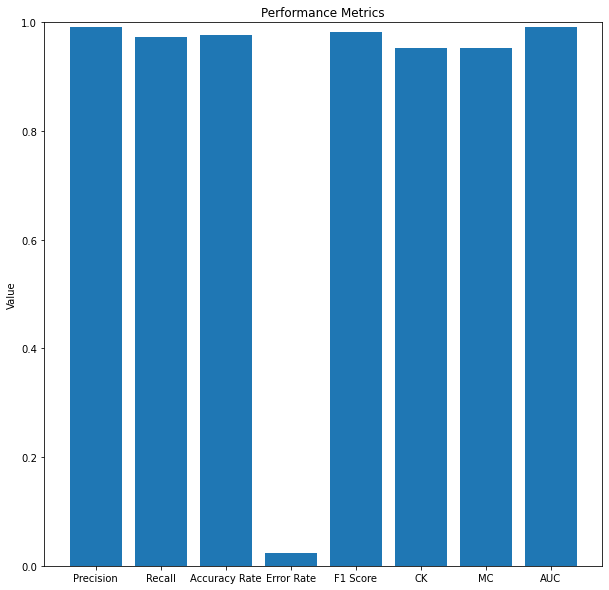

In [ ]:
Accuracy_Rate2 = accuracy_score(Y_test, Y_pred2)
Error_rate2 = 1 - Accuracy_Rate2
F1_score2 = f1_score(Y_test, Y_pred2)
Precision2 = precision_score(Y_test, Y_pred2)
Recall2 = recall_score(Y_test, Y_pred2)
CK2 = cohen_kappa_score (Y_test,Y_pred2)
MC2 = matthews_corrcoef(Y_test,Y_pred2)
auc2 = metrics.roc_auc_score(Y_test,y_pred_proba_rf)

print("Precision : {:.2f}".format(Precision2))
print("Recall OU SENSIBILITE: {:.2f}".format(Recall2))
print("Accuracy rate: ", Accuracy_Rate2)
print("Error rate : ",Error_rate2)
print("F1_score: ", F1_score2)
print("CK:", CK2)
print("MC:", MC2)
print("AUC:", auc2)


# create a list of metric names and values
metric_names = ["Precision", "Recall", "Accuracy Rate", "Error Rate", "F1 Score", "CK", "MC","AUC"]
metric_values = [Precision2, Recall2, Accuracy_Rate2, Error_rate2, F1_score2, CK2, MC2,auc2]

# create a bar chart
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(metric_names, metric_values)
ax.set_ylabel('Value')
ax.set_ylim([0,1])
ax.set_title('Performance Metrics')
plt.show()

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, matthews_corrcoef, roc_auc_score

# Définir les métriques à évaluer
metrics = {
    "Accuracy Rate": accuracy_score,
    "Error Rate": lambda y_true, y_pred: 1 - accuracy_score(y_true, y_pred),
    "F1 Score": f1_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "Cohen's Kappa": cohen_kappa_score,
    "Matthews Correlation Coefficient": matthews_corrcoef,
    "AUC": roc_auc_score
}

# Nombre d'échantillons bootstrap
n_iterations = 1000

# Initialiser un dictionnaire pour stocker les intervalles de confiance
confidence_intervals = {}

# Boucle à travers les métriques
for metric_name, metric_func in metrics.items():
    # Liste pour stocker les métriques échantillonnées
    metric_samples = []

    # Boucle pour effectuer le bootstrap
    for _ in range(n_iterations):
        # Échantillonnage bootstrap des prédictions
        indices = np.random.choice(len(y_pred_proba_rf), len(y_pred_proba_rf), replace=True)
        bootstrap_preds = y_pred_proba_rf[indices]
        bootstrap_labels = Y_test[indices]

        # Calcul de la métrique pour l'échantillon bootstrap
        metric_value = metric_func(bootstrap_labels, np.round(bootstrap_preds))
        metric_samples.append(metric_value)

    # Calcul de l'intervalle de confiance à 95% pour la métrique
    confidence_interval = np.percentile(metric_samples, [2.5, 97.5])
    confidence_intervals[metric_name] = confidence_interval

    print(f"{metric_name} Confidence Interval (95%):", confidence_interval)


Accuracy Rate Confidence Interval (95%): [0.95402299 0.99425287]
Error Rate Confidence Interval (95%): [0.00574713 0.04597701]
F1 Score Confidence Interval (95%): [0.95964012 0.99578234]
Precision Confidence Interval (95%): [0.96841265 1.        ]
Recall Confidence Interval (95%): [0.94 1.  ]
Cohen's Kappa Confidence Interval (95%): [0.89913681 0.98830173]
Matthews Correlation Coefficient Confidence Interval (95%): [0.90160287 0.98846192]
AUC Confidence Interval (95%): [0.95469541 0.99557522]


## 3- Arbre de décision

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Importation de la classe DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Création et entraînement du modèle d'arbre de décision
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Prédire les classes pour les données de test en utilisant les mêmes fonctionnalités sélectionnées
Y_pred3 = DT.predict(X_test)

# Afficher les prédictions
print(Y_pred3)

[1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1
 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1]


In [ ]:
CM3 = confusion_matrix(Y_test, Y_pred3)
CM3

array([[ 66,   1],
       [  5, 102]], dtype=int64)

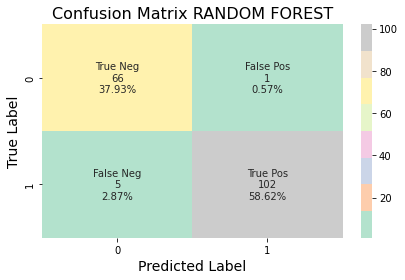

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM3.flatten()/np.sum(CM3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM3, annot=labels, fmt='', cmap='Pastel2')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix RANDOM FOREST', fontsize=16)
plt.tight_layout()
plt.show()

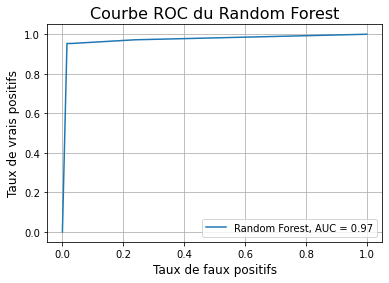

In [ ]:
# Prédictions des probabilités pour la classe positive (classe 1)
y_pred_proba_dt = DT.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs et de vrais positifs
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_proba_dt)

# Calcul de l'aire sous la courbe ROC (AUC)
auc_rf = roc_auc_score(Y_test, y_pred_proba_dt)

# Tracer la courbe ROC
plt.plot(fpr_rf, tpr_rf, label="Random Forest, AUC = {:.2f}".format(auc_rf))
plt.legend(loc="lower right")
plt.title('Courbe ROC du Random Forest', fontsize=16)
plt.xlabel('Taux de faux positifs', fontsize=12)
plt.ylabel('Taux de vrais positifs', fontsize=12)
plt.grid(True)
plt.show()

Precision: 0.99 (CI: 0.96 - 1.02)
Recall: 0.95 (CI: 0.93 - 0.98)
Accuracy Rate: 0.97 (CI: 0.94 - 0.99)
F1 Score: 0.97 (CI: 0.94 - 1.00)
Cohen's Kappa: 0.93 (CI: 0.90 - 0.96)
Matthews Corrcoef: 0.93 (CI: 0.90 - 0.96)
AUC: 0.97 (CI: 0.95 - 1.00)


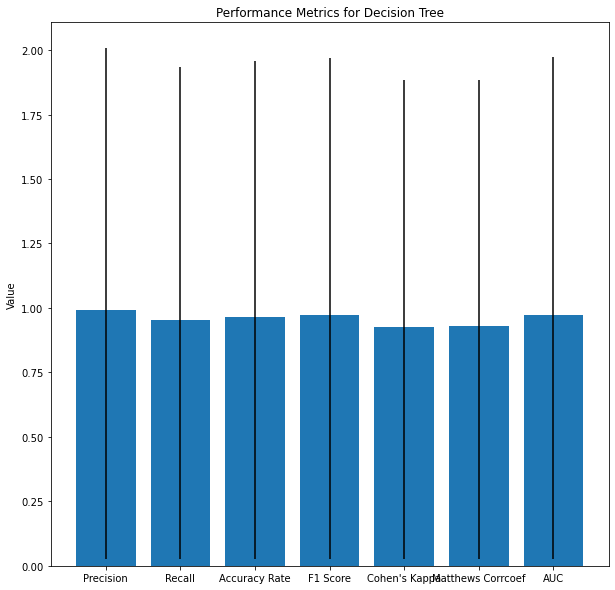

In [ ]:

# Prédictions des probabilités pour la classe positive (classe 1)
y_pred_proba_dt = DT.predict_proba(X_test)[:, 1]

# Calculer les métriques
Accuracy_Rate_dt = accuracy_score(Y_test, Y_pred3)
F1_score_dt = f1_score(Y_test, Y_pred3)
Precision_dt = precision_score(Y_test, Y_pred3)
Recall_dt = recall_score(Y_test, Y_pred3)
CK_dt = cohen_kappa_score(Y_test, Y_pred3)
MC_dt = matthews_corrcoef(Y_test, Y_pred3)
auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)

# Calculer les intervalles de confiance
conf_level = 0.95

# Create a list of metric names and values
metric_names_dt = ["Precision", "Recall", "Accuracy Rate", "F1 Score", "Cohen's Kappa", "Matthews Corrcoef", "AUC"]
metric_values_dt = [Precision_dt, Recall_dt, Accuracy_Rate_dt, F1_score_dt, CK_dt, MC_dt, auc_dt]

# Calculate confidence intervals using normal distribution approximation
conf_intervals_dt = [stats.norm.interval(conf_level, loc=metric_val, scale=stats.sem(Y_pred3 == Y_test)) for metric_val in metric_values_dt]

# Print metric names, values, and confidence intervals
for name, value, interval in zip(metric_names_dt, metric_values_dt, conf_intervals_dt):
    print(f"{name}: {value:.2f} (CI: {interval[0]:.2f} - {interval[1]:.2f})")

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(metric_names_dt, metric_values_dt, yerr=np.array(conf_intervals_dt).T)
ax.set_ylabel('Value')
ax.set_title('Performance Metrics for Decision Tree')
plt.show()


## 4- Support Vector Machine (SVM)

In [ ]:
# Importation de la classe SVM
from sklearn.svm import SVC

# Création et entraînement du modèle SVM
SVM= SVC(probability=True, random_state=42)
SVM.fit(X_train, Y_train)

SVC(probability=True, random_state=42)

In [ ]:
# Prédire les classes pour les données de test en utilisant les mêmes fonctionnalités sélectionnées
Y_pred4 = SVM.predict(X_test)

# Afficher les prédictions
print(Y_pred4)

[1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1
 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1]


In [ ]:
CM4 = confusion_matrix(Y_test, Y_pred4)
CM4

array([[ 63,   4],
       [  5, 102]], dtype=int64)

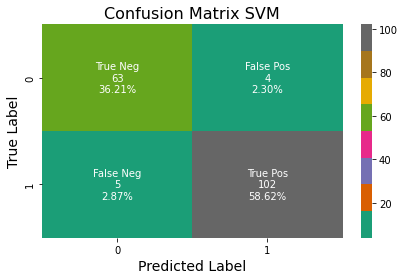

In [ ]:
import seaborn as sns
group_names_svm = ['True Neg','False Pos','False Neg','True Pos']
group_counts_svm = ['{0:0.0f}'.format(value) for value in CM4.flatten()]
group_percentages_svm = ['{0:.2%}'.format(value) for value in CM4.flatten()/np.sum(CM4)]
labels_svm = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names_svm,group_counts_svm,group_percentages_svm)]
labels_svm = np.asarray(labels_svm).reshape(2,2)
sns.heatmap(CM4, annot=labels_svm, fmt='', cmap='Dark2')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix SVM', fontsize=16)
plt.tight_layout()
plt.show()

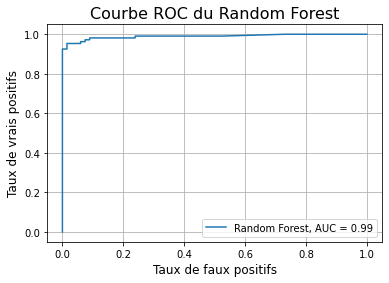

In [ ]:
# Prédictions des probabilités pour la classe positive (classe 1)
y_pred_proba_svm = SVM.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs et de vrais positifs
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_proba_svm)

# Calcul de l'aire sous la courbe ROC (AUC)
auc_svm = roc_auc_score(Y_test, y_pred_proba_svm)

# Tracer la courbe ROC
plt.plot(fpr_rf, tpr_rf, label="Random Forest, AUC = {:.2f}".format(auc_svm))
plt.legend(loc="lower right")
plt.title('Courbe ROC du Random Forest', fontsize=16)
plt.xlabel('Taux de faux positifs', fontsize=12)
plt.ylabel('Taux de vrais positifs', fontsize=12)
plt.grid(True)
plt.show()

Precision: 0.96 (CI: 0.93 - 1.00)
Recall: 0.95 (CI: 0.92 - 0.99)
Accuracy Rate: 0.95 (CI: 0.92 - 0.98)
F1 Score: 0.96 (CI: 0.92 - 0.99)
Cohen's Kappa: 0.89 (CI: 0.86 - 0.92)
Matthews Corrcoef: 0.89 (CI: 0.86 - 0.92)
AUC: 0.99 (CI: 0.96 - 1.02)


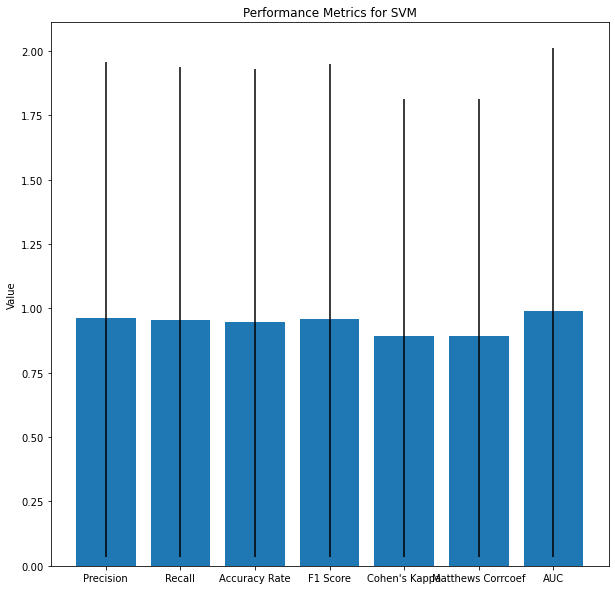

In [ ]:
# Métriques de performance pour SVM
Accuracy_Rate_svm = accuracy_score(Y_test, Y_pred4)
F1_score_svm = f1_score(Y_test, Y_pred4)
Precision_svm = precision_score(Y_test, Y_pred4)
Recall_svm = recall_score(Y_test, Y_pred4)
CK_svm = cohen_kappa_score(Y_test, Y_pred4)
MC_svm = matthews_corrcoef(Y_test, Y_pred4)

# Métriques de performance pour SVM avec les prédictions renommées Y_pred4
Accuracy_Rate_svm = accuracy_score(Y_test, Y_pred4)
F1_score_svm = f1_score(Y_test, Y_pred4)
Precision_svm = precision_score(Y_test, Y_pred4)
Recall_svm = recall_score(Y_test, Y_pred4)
CK_svm = cohen_kappa_score(Y_test, Y_pred4)
MC_svm = matthews_corrcoef(Y_test, Y_pred4)

# Calcul des intervalles de confiance
conf_intervals_svm = [stats.norm.interval(conf_level, loc=metric_val, scale=stats.sem(Y_pred4 == Y_test)) for metric_val in [Precision_svm, Recall_svm, Accuracy_Rate_svm, F1_score_svm, CK_svm, MC_svm, auc_svm]]

# Impression des métriques avec intervalles de confiance
metric_names_svm = ["Precision", "Recall", "Accuracy Rate", "F1 Score", "Cohen's Kappa", "Matthews Corrcoef", "AUC"]
metric_values_svm = [Precision_svm, Recall_svm, Accuracy_Rate_svm, F1_score_svm, CK_svm, MC_svm, auc_svm]

for name, value, interval in zip(metric_names_svm, metric_values_svm, conf_intervals_svm):
    print(f"{name}: {value:.2f} (CI: {interval[0]:.2f} - {interval[1]:.2f})")

# Création d'un graphique en barres
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(metric_names_svm, metric_values_svm, yerr=np.array(conf_intervals_svm).T)
ax.set_ylabel('Value')
ax.set_title('Performance Metrics for SVM')
plt.show()